# Imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Data files

In [2]:
path = "CRC/"

### Converting tsv to csv

In [3]:
tsvfiles = glob.glob(path + "/*.tsv") 
for t in tsvfiles:
    tsv = pd.read_table(t, sep='\t')
    tsv.to_csv(t[:-4] + '.csv', index=False)


In [4]:
all_files = glob.glob(path + "/*.csv")

In [5]:
all_files

['CRC\\P003.MArumugam.Data.AT-CRC_species.csv',
 'CRC\\P003.MArumugam.Data.CN-CRC_species.csv',
 'CRC\\P003.MArumugam.Data.DE-CRC_species.csv',
 'CRC\\P003.MArumugam.Data.FR-CRC_species.csv',
 'CRC\\P003.MArumugam.Data.IT-CRC-2_species.csv',
 'CRC\\P003.MArumugam.Data.IT-CRC_species.csv',
 'CRC\\P003.MArumugam.Data.JP-CRC_species.csv',
 'CRC\\P003.MArumugam.Data.US-CRC_species.csv']

### Concatenating all csv files and adding labels

In [6]:
df = pd.concat([pd.read_csv(files).assign(Country=os.path.basename(files).split('.')[3]) for files in all_files])

In [7]:
df.to_csv('CRC/all_data.csv')

# Examining the created file

In [8]:
df = pd.read_csv(path + "all_data.csv")

In [9]:
df

,Unnamed: 0,condition,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Enterococcus_faecalis___ref_mOTU_v2_0116__,Lactobacillus_salivarius___ref_mOTU_v2_0125__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,...,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7781__,unknown_Clostridiales___meta_mOTU_v2_7782__,unknown_Clostridiales___meta_mOTU_v2_7784__,Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7795__,unknown_Clostridiales___meta_mOTU_v2_7800__,Country
0,0,control,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000083,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000083,0.000083,AT-CRC_species
1,1,control,0.000591,0.000066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066,...,0.000000,0.000000,0.000788,0.000000,0.000000,0.0,0.0,0.000000,0.000000,AT-CRC_species
2,2,control,0.000840,0.000065,0.002454,0.000000,0.000065,0.013111,0.000000,0.000065,...,0.000000,0.000194,0.000065,0.000000,0.000840,0.0,0.0,0.001808,0.000000,AT-CRC_species
3,3,control,0.000000,0.000071,0.000000,0.000000,0.000000,0.000000,0.000213,0.000071,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,AT-CRC_species
4,4,control,0.000085,0.019236,0.001111,0.000256,0.000085,0.000085,0.000000,0.000000,...,0.000171,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,AT-CRC_species
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,99,CRC,0.000000,0.000118,0.000000,0.000000,0.000059,0.000000,0.000118,0.000000,...,0.000000,0.000000,0.001118,0.000000,0.000000,0.0,0.0,0.000000,0.000000,US-CRC_species
764,100,CRC,0.000038,0.000038,0.000000,0.000000,0.000000,0.000000,0.000075,0.000038,...,0.000000,0.000000,0.000151,0.000038,0.000000,0.0,0.0,0.000000,0.000000,US-CRC_species
765,101,control,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000348,0.000044,0.001741,0.000000,0.000435,0.0,0.0,0.000000,0.000044,US-CRC_species
766,102,CRC,0.000000,0.000312,0.000000,0.000000,0.000208,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000208,0.000000,0.0,0.0,0.000000,0.000156,US-CRC_species


In [10]:
country_count = df.groupby(['Country'], sort=False).size().reset_index(name='Count')
print (country_count)

            Country  Count
0    AT-CRC_species    109
1    CN-CRC_species    128
2    DE-CRC_species    120
3    FR-CRC_species    114
4  IT-CRC-2_species     60
5    IT-CRC_species     53
6    JP-CRC_species     80
7    US-CRC_species    104


In [11]:
country_condition_count = df.groupby(["Country","condition"]).size().reset_index(name='Count')
print (country_condition_count)

             Country condition  Count
0     AT-CRC_species       CRC     46
1     AT-CRC_species   control     63
2     CN-CRC_species       CRC     74
3     CN-CRC_species   control     54
4     DE-CRC_species       CRC     60
5     DE-CRC_species   control     60
6     FR-CRC_species       CRC     53
7     FR-CRC_species   control     61
8   IT-CRC-2_species       CRC     32
9   IT-CRC-2_species   control     28
10    IT-CRC_species       CRC     29
11    IT-CRC_species   control     24
12    JP-CRC_species       CRC     40
13    JP-CRC_species   control     40
14    US-CRC_species       CRC     52
15    US-CRC_species   control     52


In [12]:
df = df.drop(["Unnamed: 0","Country"], axis=1)

In [13]:
df.describe()

,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Enterococcus_faecalis___ref_mOTU_v2_0116__,Lactobacillus_salivarius___ref_mOTU_v2_0125__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,Streptococcus_parasanguinis___ref_mOTU_v2_0144__,Streptococcus_sp._HSISM1___ref_mOTU_v2_0145__,...,unknown_Porphyromonas___meta_mOTU_v2_7777__,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7781__,unknown_Clostridiales___meta_mOTU_v2_7782__,unknown_Clostridiales___meta_mOTU_v2_7784__,Clostridium_sp._CAG__230___meta_mOTU_v2_7788__,Clostridium_sp._CAG__1193___meta_mOTU_v2_7789__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7795__,unknown_Clostridiales___meta_mOTU_v2_7800__
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,...,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.000093,0.017398,0.000467,0.000561,0.000256,0.000173,0.000075,0.000062,0.000941,0.000183,...,0.000085,0.000337,0.000118,0.000436,0.000082,0.000259,0.000045,0.000221,0.000239,0.000433
std,0.000442,0.067998,0.005845,0.005987,0.002036,0.001434,0.000356,0.000327,0.002679,0.000560,...,0.001062,0.001770,0.000475,0.001177,0.000461,0.000857,0.000677,0.001567,0.001179,0.002536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000078,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000189,0.000071,...,0.000000,0.000000,0.000000,0.000046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000064,0.004793,0.000000,0.000000,0.000000,0.000000,0.000069,0.000046,0.000562,0.000175,...,0.000000,0.000137,0.000000,0.000439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000042
max,0.008120,0.774361,0.134017,0.113759,0.045770,0.025873,0.006772,0.007924,0.027635,0.011286,...,0.020386,0.036133,0.007367,0.021321,0.008065,0.007216,0.013487,0.032325,0.021964,0.029237


# Creating plots for distribution of data

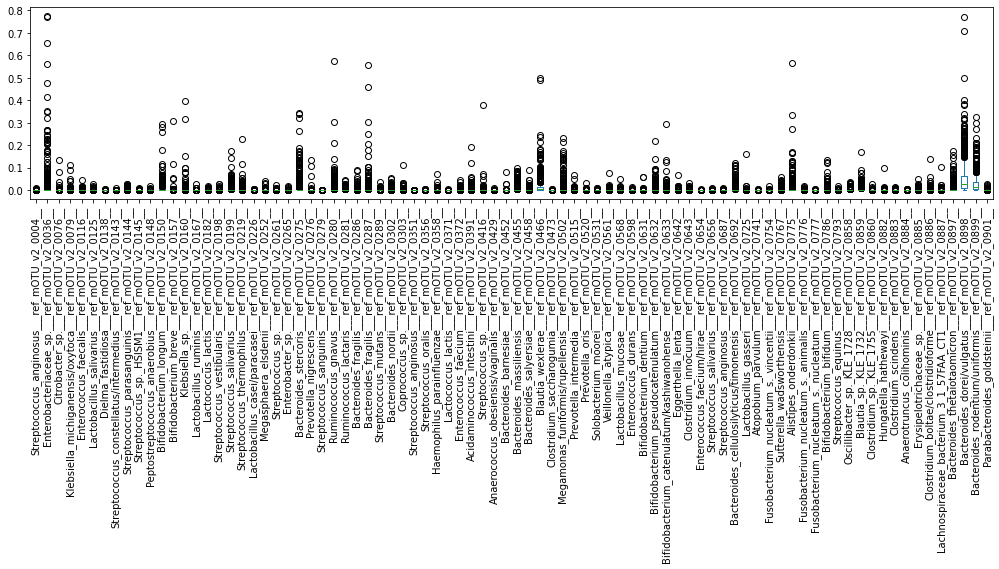

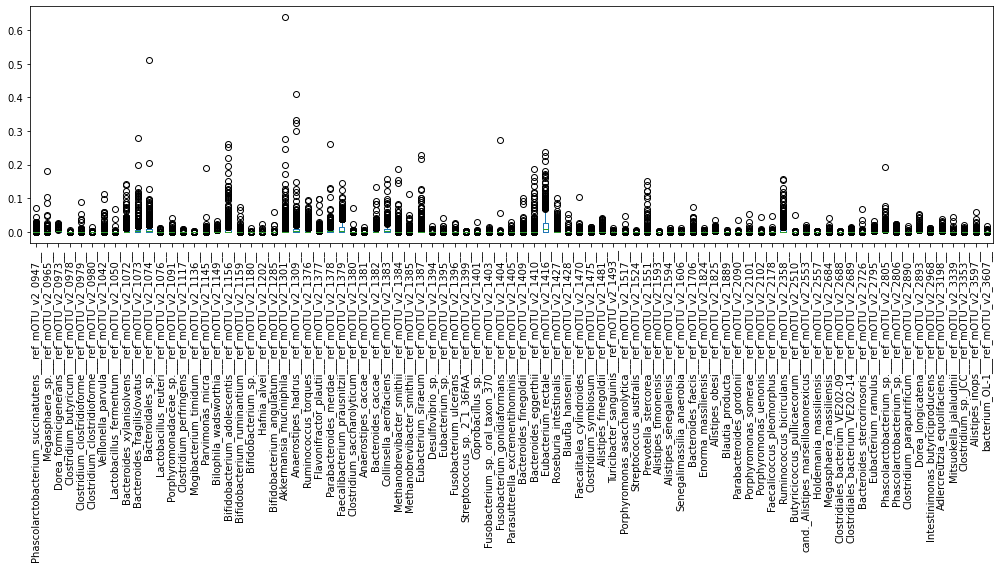

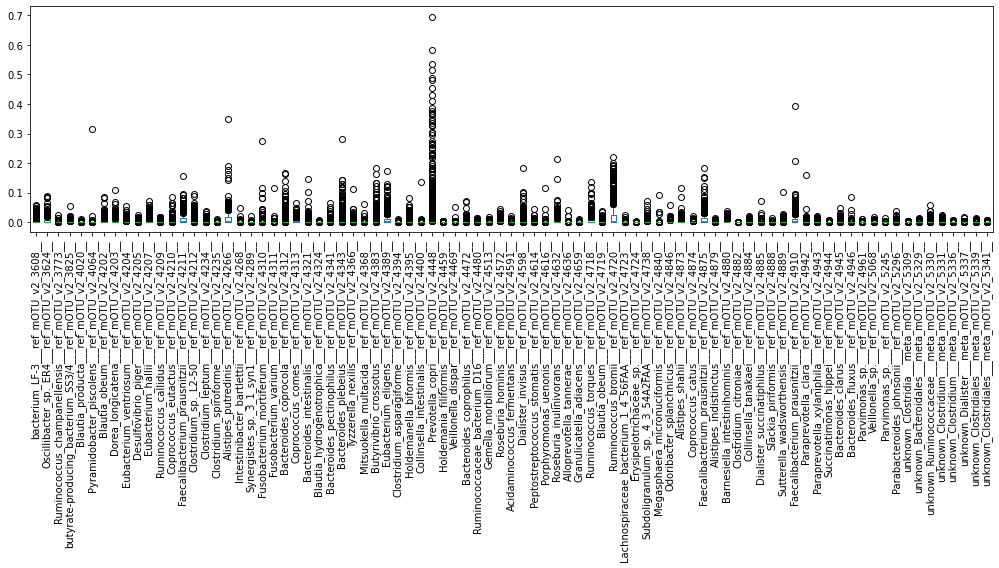

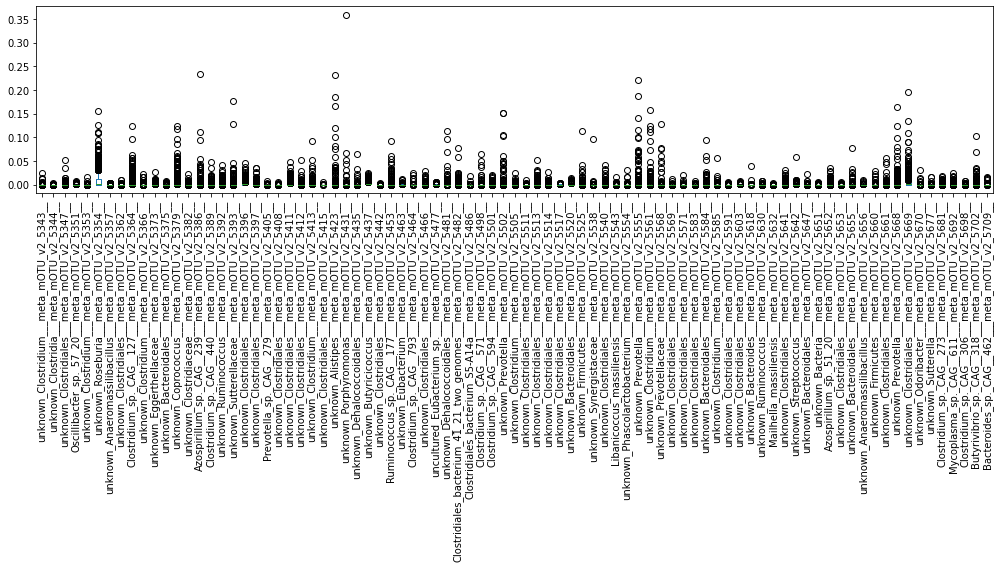

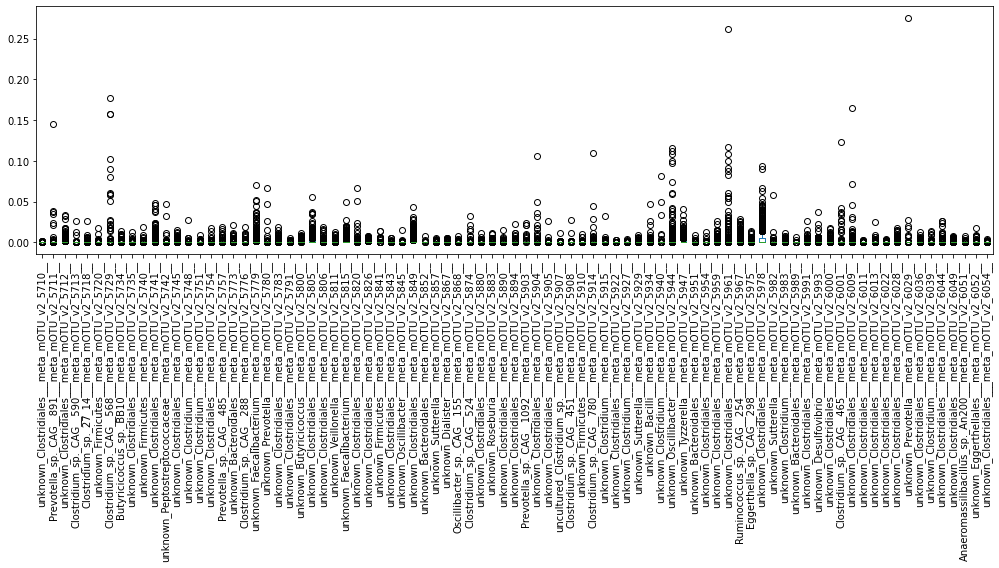

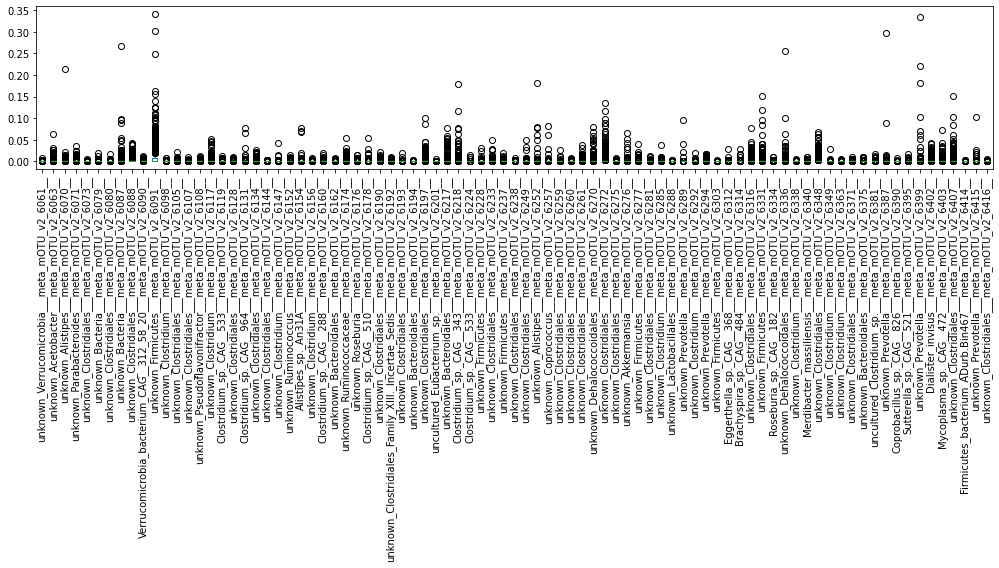

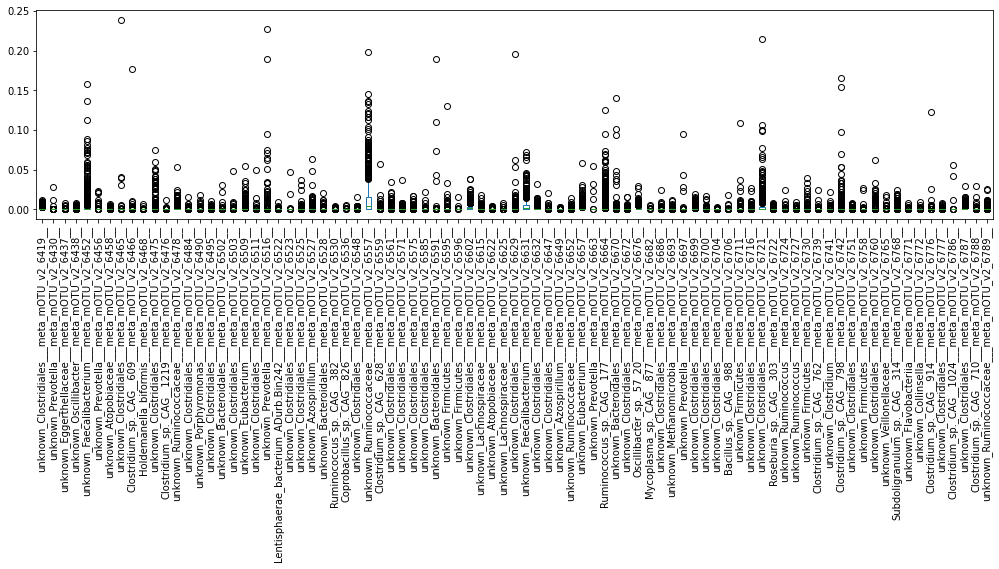

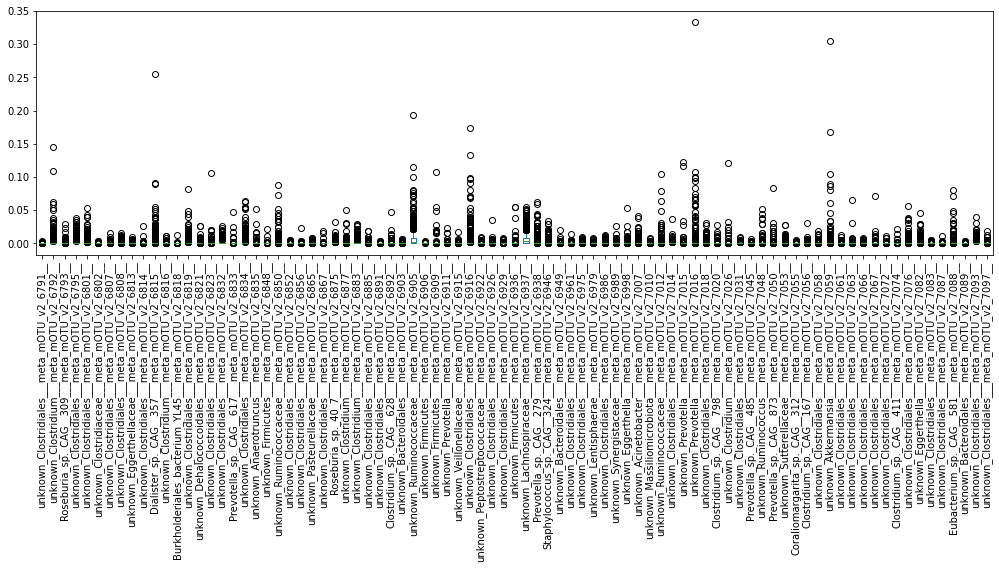

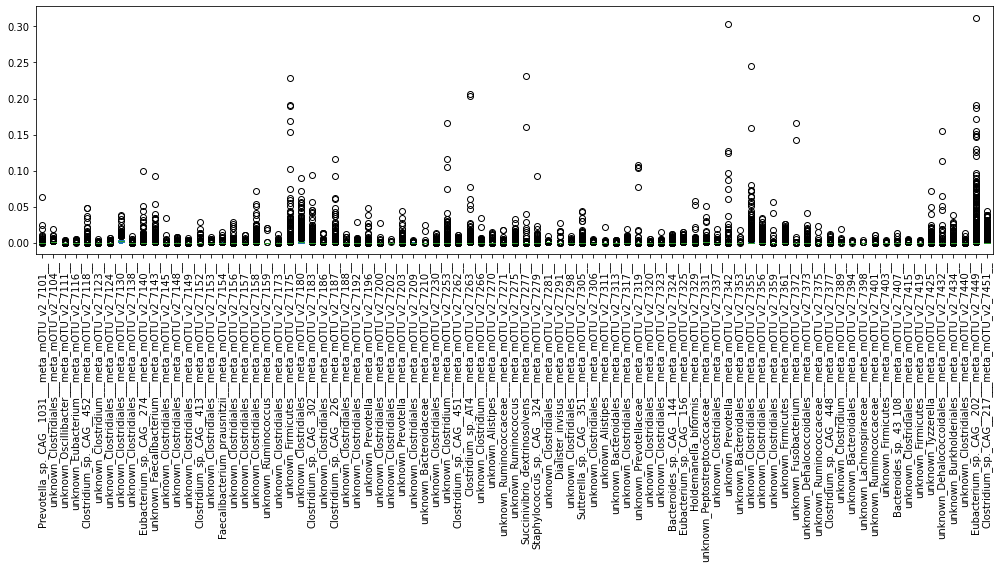

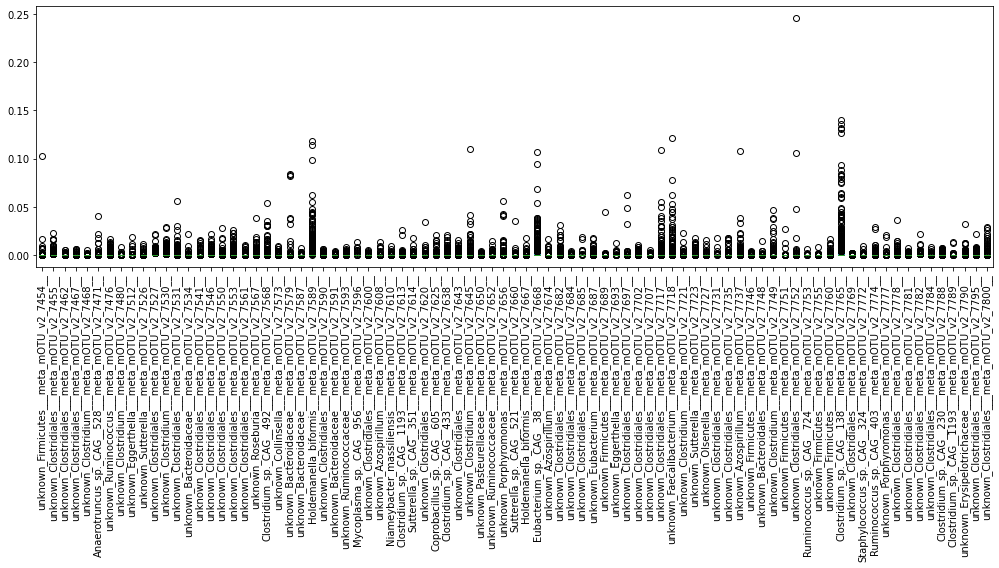

In [16]:
df.iloc[:,0:85].plot(kind='box', rot=90, figsize=(14, 8))
plt.tight_layout()
plt.savefig("plots/1.jpg")

df.iloc[:,85:170].plot(kind='box', rot=90, figsize=(14, 8))
plt.tight_layout()
plt.savefig("plots/2.jpg")

df.iloc[:,170:255].plot(kind='box', rot=90, figsize=(14, 8))
plt.tight_layout()
plt.savefig("plots/3.jpg")

df.iloc[:,255:340].plot(kind='box', rot=90, figsize=(14, 8))
plt.tight_layout()
plt.savefig("plots/4.jpg")

df.iloc[:,340:425].plot(kind='box', rot=90, figsize=(14, 8))
plt.tight_layout()
plt.savefig("plots/5.jpg")

df.iloc[:,425:510].plot(kind='box', rot=90, figsize=(14, 8))
plt.tight_layout()
plt.savefig("plots/6.jpg")

df.iloc[:,510:595].plot(kind='box', rot=90, figsize=(14, 8))
plt.tight_layout()
plt.savefig("plots/7.jpg")

df.iloc[:,595:680].plot(kind='box', rot=90, figsize=(14, 8))
plt.tight_layout()
plt.savefig("plots/8.jpg")

df.iloc[:,680:765].plot(kind='box', rot=90, figsize=(14, 8))
plt.tight_layout()
plt.savefig("plots/9.jpg")

df.iloc[:,765:850].plot(kind='box', rot=90, figsize=(14, 8))
plt.tight_layout()
plt.savefig("plots/10.jpg")